In [58]:
# DNN to predict Cardiovascular disease
import csv
import time
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn.model_selection as sk_model
import sklearn.preprocessing as sk_preprocessing
import sklearn.metrics as sk_metrics
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 8)

In [59]:
# dataset input and output
url = "https://raw.githubusercontent.com/EngineerRcMak/Stroke-Prediction-Imbalanced-Dataset/main/Stroke%20Prediction.csv"
dataset = pd.read_csv(url, delimiter = ',')
dataset_len = dataset.shape[0]
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [60]:
del dataset["work_type"]
del dataset["id"]

In [61]:
dataset

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,Urban,58.64,20.4,never smoked,0
43396,Female,56.0,0,0,Yes,Urban,213.61,55.4,formerly smoked,0
43397,Female,82.0,1,0,Yes,Urban,91.94,28.9,formerly smoked,0
43398,Male,40.0,0,0,Yes,Urban,99.16,33.2,never smoked,0


In [62]:
dataset["gender"] = dataset["gender"].replace({"Male":0,"Female":1})
dataset["ever_married"]  = dataset["ever_married"].replace({"No":0,"Yes":1})
dataset["Residence_type"]  = dataset["Residence_type"].replace({"Rural":0,"Urban":1})
dataset["smoking_status"]  = dataset["smoking_status"].replace({"never smoked":0,"formerly smoked":1})

dataset

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,3.0,0,0,0,0,95.12,18.0,NaN,0
1,0,58.0,1,0,1,1,87.96,39.2,0,0
2,1,8.0,0,0,0,1,110.89,17.6,NaN,0
3,1,70.0,0,0,1,0,69.04,35.9,1,0
4,0,14.0,0,0,0,0,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...
43395,1,10.0,0,0,0,1,58.64,20.4,0,0
43396,1,56.0,0,0,1,1,213.61,55.4,1,0
43397,1,82.0,1,0,1,1,91.94,28.9,1,0
43398,0,40.0,0,0,1,1,99.16,33.2,0,0


In [63]:
# dataset summary
dataset.describe()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,42.217894,0.093571,0.047512,0.643733,0.501290,104.482750,28.605038,0.018041
std,22.519649,0.291235,0.212733,0.478901,0.500004,43.111751,7.770020,0.133103
min,0.080000,0.000000,0.000000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,24.000000,0.000000,0.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,44.000000,0.000000,0.000000,1.000000,1.000000,91.580000,27.700000,0.000000
75%,60.000000,0.000000,0.000000,1.000000,1.000000,112.070000,32.900000,0.000000
max,82.000000,1.000000,1.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [64]:
# extraction of input and output from dataset for easy calculation
# "Outcome" = output column
# all other columns are input columns

dataset_columns = dataset.columns.values.tolist()
dataset_columns_number = len(dataset_columns)
input_columns  = dataset_columns[: dataset_columns_number - 1] 
output_columns = dataset_columns[  dataset_columns_number - 1 :]

input_columns, output_columns

(['gender',
  'age',
  'hypertension',
  'heart_disease',
  'ever_married',
  'Residence_type',
  'avg_glucose_level',
  'bmi',
  'smoking_status'],
 ['stroke'])

In [65]:
# build input matrix
real_input  = dataset[input_columns].copy()
real_input

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,3.0,0,0,0,0,95.12,18.0,NaN
1,0,58.0,1,0,1,1,87.96,39.2,0
2,1,8.0,0,0,0,1,110.89,17.6,NaN
3,1,70.0,0,0,1,0,69.04,35.9,1
4,0,14.0,0,0,0,0,161.28,19.1,NaN
...,...,...,...,...,...,...,...,...,...
43395,1,10.0,0,0,0,1,58.64,20.4,0
43396,1,56.0,0,0,1,1,213.61,55.4,1
43397,1,82.0,1,0,1,1,91.94,28.9,1
43398,0,40.0,0,0,1,1,99.16,33.2,0


In [66]:
# build output matrix
real_output = dataset[output_columns].copy() 
real_output

,stroke
0,0
1,0
2,0
3,0
4,0
...,...
43395,0
43396,0
43397,0
43398,0


In [67]:
# outlier detection, data normalization for next several sessions.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7bcd32650>,
      dtype=object)

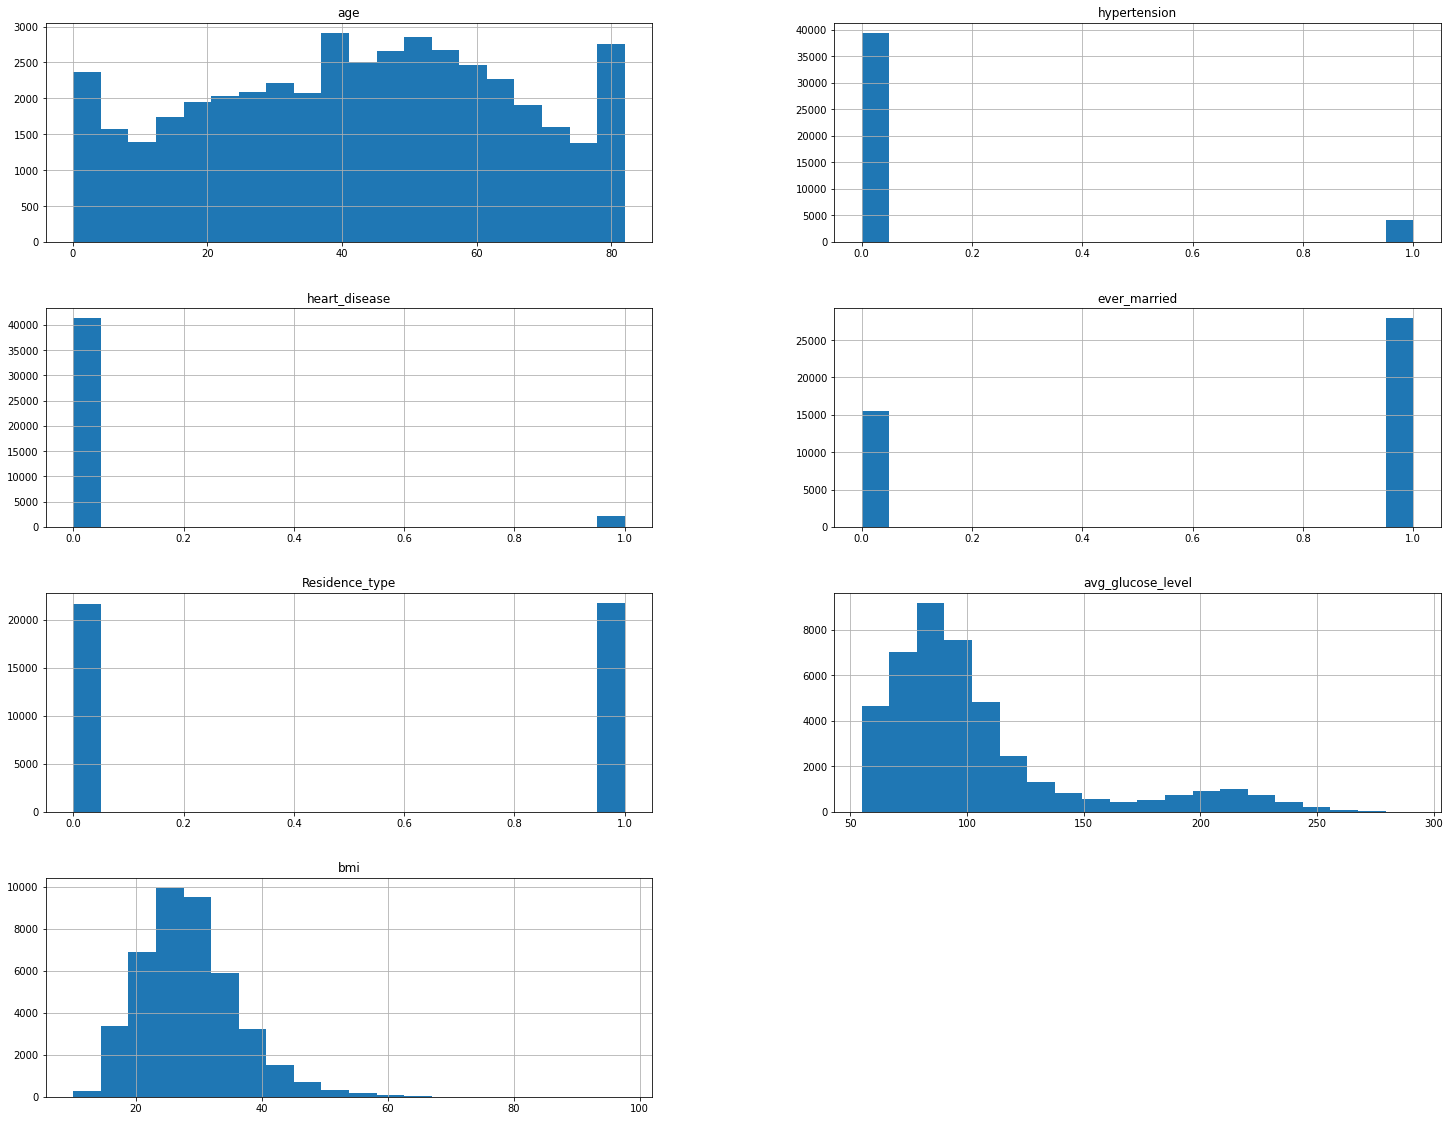

In [68]:
# histogram (data vs frequency)
real_input.hist(figsize  = (25, 25), layout = ((real_input.columns.size+1)//2, 2), bins = 20)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


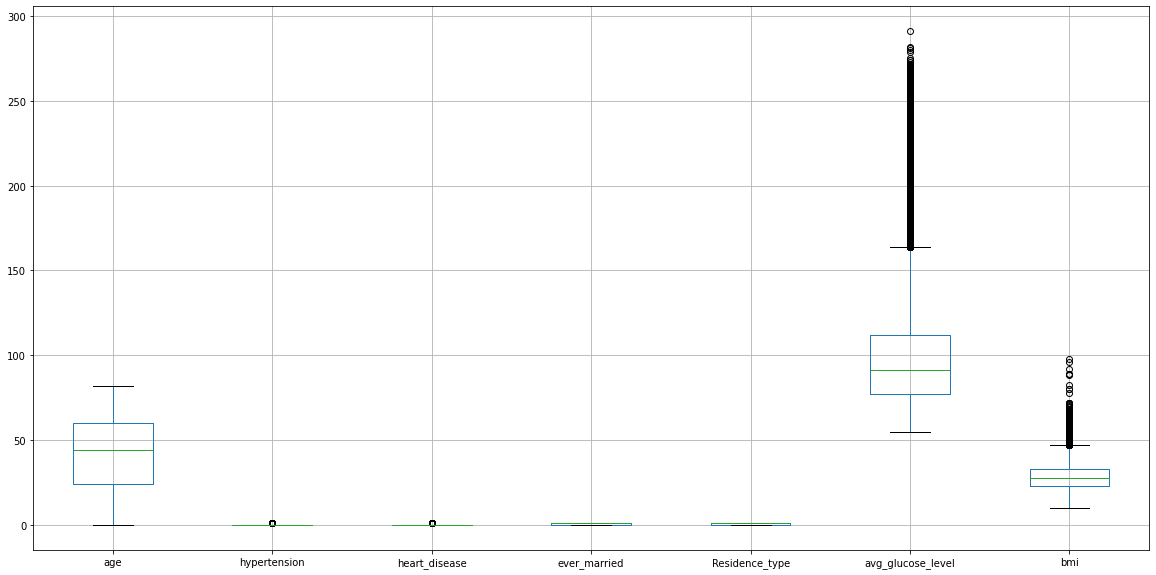

In [69]:
# boxplot.
# boxplot will tell us about outlier data and many more but to know about outlier data 
# boxplot is great.
# to know more about boxplot please visit the link below - 
# https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51
real_input.boxplot(figsize = (20, 10))

In [70]:
features = real_input.columns.values.tolist()
features

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [71]:
# outlier detection

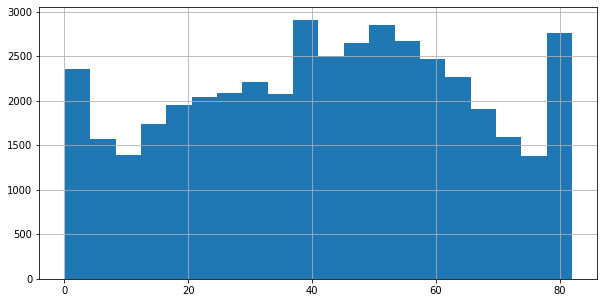

In [79]:
j = 1 
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

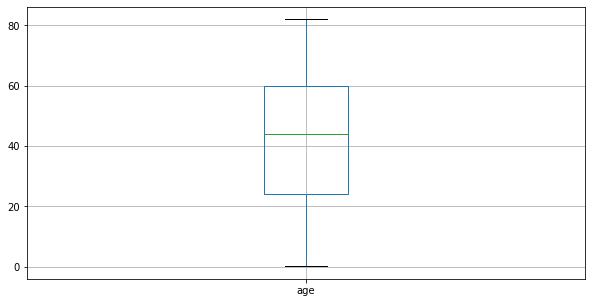

In [80]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [83]:
'''
For feature "radius_mean",
outliers found in both histogram and boxplot
Set "ap_hi" < 100 = 100 and "ap_hi" > 170 = 170 
'''


#real_input[feature] = real_input[feature].mask(real_input[feature] < 100., other = 100.)

# No-Cardiovascular total sum
total_sum_no_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 12) &\
                                                         (real_input[feature] <= 18) &\
                                                         (real_output["stroke"] == 0)])
# No-Cardiovascular zero_len
zero_len_no_cardiovascular = real_input[feature][(real_input[feature] < 12) &\
                                           (real_output["stroke"] == 0) &\
                                           (real_input[feature] > 18)].size
# No-Cardiovascular dataset size
dataset_len_no_cardiovascular = real_output[(real_output["stroke"] == 0)].size
# No-Cardiovascular mean value
mean_value_no_cardiovascular = total_sum_no_cardiovascular / (dataset_len_no_cardiovascular\
                                                  - zero_len_no_cardiovascular)

# Cardiovascular total sum
total_sum_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 12) &\
                                                      (real_input[feature] <= 18) &\
                                                      (real_output["stroke"] == 1)])
# Cardiovascular zero_len
zero_len_cardiovascular = real_input[feature][(real_input[feature] < 12) &\
                                        (real_output["stroke"] == 1) &\
                                        (real_input[feature]) > 18].size
# Cardiovascular dataset size
dataset_len_cardiovascular = real_output[(real_output["stroke"] == 1)].size
# Cardiovascular mean value
mean_value_cardiovascular = total_sum_cardiovascular / (dataset_len_cardiovascular\
                                                  - zero_len_cardiovascular)


# No-Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 12)|(real_input[feature] > 18))&\
                                               (real_output["stroke"] == 0),\
                                               other = mean_value_no_cardiovascular)
# Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 12)|(real_input[feature] > 18))&\
                                               (real_output["stroke"] == 1),\
                                               other = mean_value_cardiovascular)

In [84]:
print("feature", feature, "details =")
real_input[feature].describe()

feature age details =


count    43400.000000
mean         2.089557
std          3.665123
min          0.017880
25%          1.103926
50%          1.103926
75%          1.103926
max         18.000000
Name: age, dtype: float64

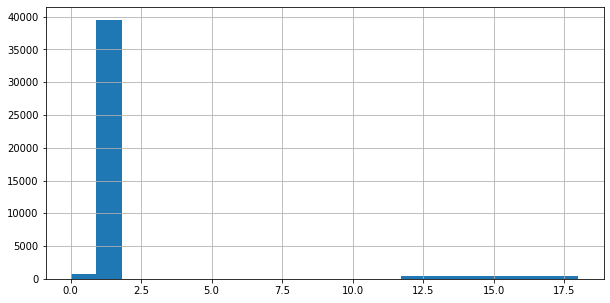

In [85]:
'''
Feature "bu" is now well distributed
'''
real_input[feature].hist(figsize = (10, 5), bins = 20)

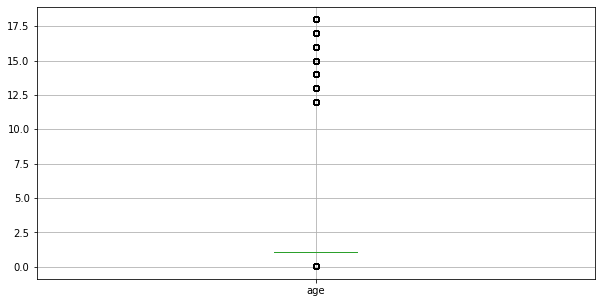

In [86]:
real_input.boxplot(column = feature, figsize = (10, 5))

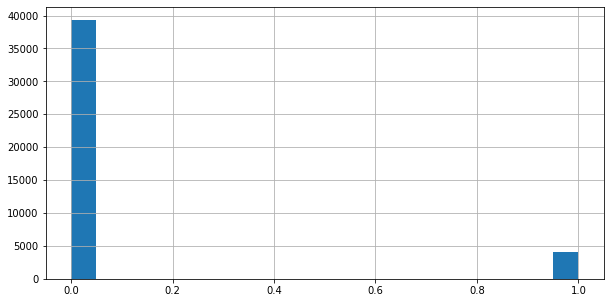

In [87]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

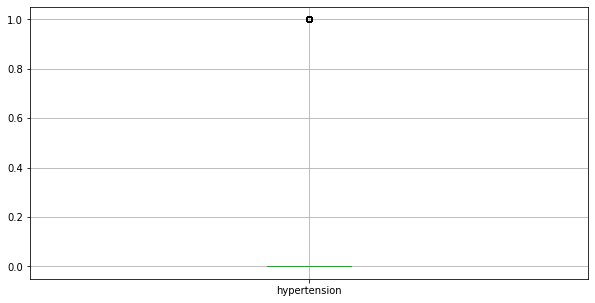

In [88]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [89]:
'''
For feature "texture_mean",
outliers found in both histogram and boxplot
Set "ap_hi" < 100 = 100 and "ap_hi" > 170 = 170 
'''


#real_input[feature] = real_input[feature].mask(real_input[feature] < 100., other = 100.)

# No-Cardiovascular total sum
total_sum_no_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 15) &\
                                                         (real_input[feature] <= 22) &\
                                                         (real_output["stroke"] == 0)])
# No-Cardiovascular zero_len
zero_len_no_cardiovascular = real_input[feature][(real_input[feature] < 15) &\
                                           (real_output["stroke"] == 0) &\
                                           (real_input[feature] > 22)].size
# No-Cardiovascular dataset size
dataset_len_no_cardiovascular = real_output[(real_output["stroke"] == 0)].size
# No-Cardiovascular mean value
mean_value_no_cardiovascular = total_sum_no_cardiovascular / (dataset_len_no_cardiovascular\
                                                  - zero_len_no_cardiovascular)

# Cardiovascular total sum
total_sum_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 15) &\
                                                      (real_input[feature] <= 22) &\
                                                      (real_output["stroke"] == 1)])
# Cardiovascular zero_len
zero_len_cardiovascular = real_input[feature][(real_input[feature] < 15) &\
                                        (real_output["stroke"] == 1) &\
                                        (real_input[feature]) > 22].size
# Cardiovascular dataset size
dataset_len_cardiovascular = real_output[(real_output["stroke"] == 1)].size
# Cardiovascular mean value
mean_value_cardiovascular = total_sum_cardiovascular / (dataset_len_cardiovascular\
                                                  - zero_len_cardiovascular)


# No-Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 15)|(real_input[feature] > 22))&\
                                               (real_output["stroke"] == 0),\
                                               other = mean_value_no_cardiovascular)
# Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 15)|(real_input[feature] > 22))&\
                                               (real_output["stroke"] == 1),\
                                               other = mean_value_cardiovascular)

In [91]:
print("feature", feature, "details =")
real_input[feature].describe()

count    43400.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: hypertension, dtype: float64

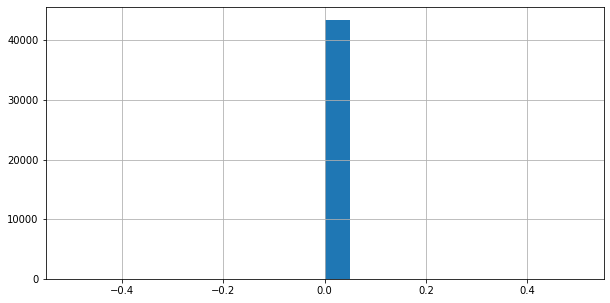

In [92]:
'''
feature "bp" is not well distributed. 
'''
real_input[feature].hist(figsize = (10, 5), bins = 20)

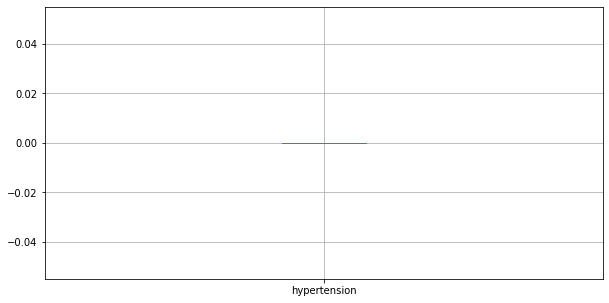

In [93]:
real_input.boxplot(column = feature, figsize = (10, 5))

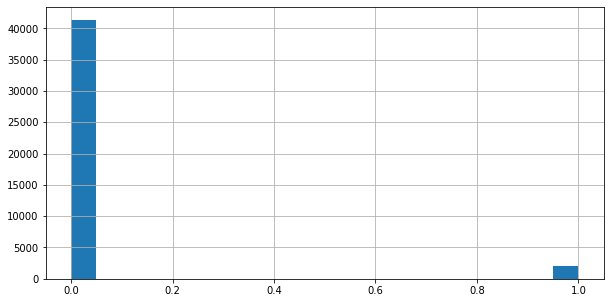

In [94]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

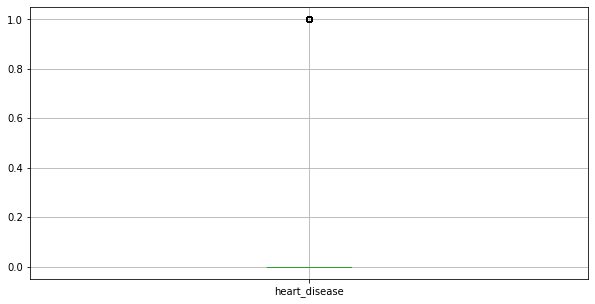

In [95]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [96]:
'''
For feature "texture_mean",
outliers found in both histogram and boxplot
Set "ap_hi" < 100 = 100 and "ap_hi" > 170 = 170 
'''


#real_input[feature] = real_input[feature].mask(real_input[feature] < 100., other = 100.)

# No-Cardiovascular total sum
total_sum_no_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 70) &\
                                                         (real_input[feature] <= 110) &\
                                                         (real_output["stroke"] == 0)])
# No-Cardiovascular zero_len
zero_len_no_cardiovascular = real_input[feature][(real_input[feature] < 70) &\
                                           (real_output["stroke"] == 0) &\
                                           (real_input[feature] > 110)].size
# No-Cardiovascular dataset size
dataset_len_no_cardiovascular = real_output[(real_output["stroke"] == 0)].size
# No-Cardiovascular mean value
mean_value_no_cardiovascular = total_sum_no_cardiovascular / (dataset_len_no_cardiovascular\
                                                  - zero_len_no_cardiovascular)

# Cardiovascular total sum
total_sum_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 70) &\
                                                      (real_input[feature] <= 110) &\
                                                      (real_output["stroke"] == 1)])
# Cardiovascular zero_len
zero_len_cardiovascular = real_input[feature][(real_input[feature] < 70) &\
                                        (real_output["stroke"] == 1) &\
                                        (real_input[feature]) > 110].size
# Cardiovascular dataset size
dataset_len_cardiovascular = real_output[(real_output["stroke"] == 1)].size
# Cardiovascular mean value
mean_value_cardiovascular = total_sum_cardiovascular / (dataset_len_cardiovascular\
                                                  - zero_len_cardiovascular)


# No-Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 70)|(real_input[feature] > 110))&\
                                               (real_output["stroke"] == 0),\
                                               other = mean_value_no_cardiovascular)
# Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 70)|(real_input[feature] > 110))&\
                                               (real_output["stroke"] == 1),\
                                               other = mean_value_cardiovascular)

In [97]:
print("feature", feature, "details =")
real_input[feature].describe()

feature heart_disease details =


count    43400.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: heart_disease, dtype: float64

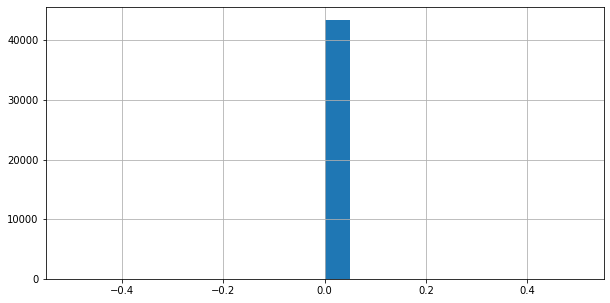

In [98]:
real_input[feature].hist(figsize = (10, 5), bins = 20)

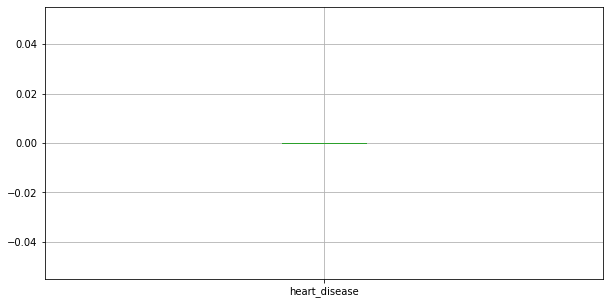

In [99]:
real_input.boxplot(column = feature, figsize = (10, 5))

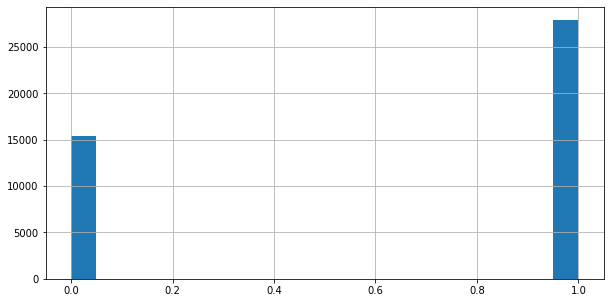

In [100]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

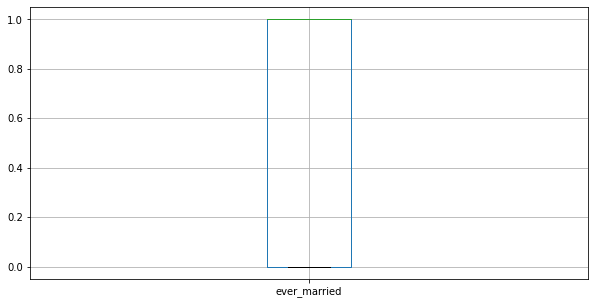

In [101]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [103]:
'''
For feature "area_mean",
outliers found in both histogram and boxplot
Set "ap_hi" < 100 = 100 and "ap_hi" > 170 = 170 
'''


#real_input[feature] = real_input[feature].mask(real_input[feature] < 100., other = 100.)

# No-Cardiovascular total sum
total_sum_no_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 470) &\
                                                         (real_input[feature] <= 950) &\
                                                         (real_output["stroke"] == 0)])
# No-Cardiovascular zero_len
zero_len_no_cardiovascular = real_input[feature][(real_input[feature] < 470) &\
                                           (real_output["stroke"] == 0) &\
                                           (real_input[feature] > 950)].size
# No-Cardiovascular dataset size
dataset_len_no_cardiovascular = real_output[(real_output["stroke"] == 0)].size
# No-Cardiovascular mean value
mean_value_no_cardiovascular = total_sum_no_cardiovascular / (dataset_len_no_cardiovascular\
                                                  - zero_len_no_cardiovascular)

# Cardiovascular total sum
total_sum_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 470) &\
                                                      (real_input[feature] <= 950) &\
                                                      (real_output["stroke"] == 1)])
# Cardiovascular zero_len
zero_len_cardiovascular = real_input[feature][(real_input[feature] < 470) &\
                                        (real_output["stroke"] == 1) &\
                                        (real_input[feature]) > 950].size
# Cardiovascular dataset size
dataset_len_cardiovascular = real_output[(real_output["stroke"] == 1)].size
# Cardiovascular mean value
mean_value_cardiovascular = total_sum_cardiovascular / (dataset_len_cardiovascular\
                                                  - zero_len_cardiovascular)


# No-Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 470)|(real_input[feature] > 950))&\
                                               (real_output["stroke"] == 0),\
                                               other = mean_value_no_cardiovascular)
# Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 470)|(real_input[feature] > 950))&\
                                               (real_output["stroke"] == 1),\
                                               other = mean_value_cardiovascular)

In [104]:
print("feature", feature, "details =")
real_input[feature].describe()

feature ever_married details =


count    43400.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: ever_married, dtype: float64

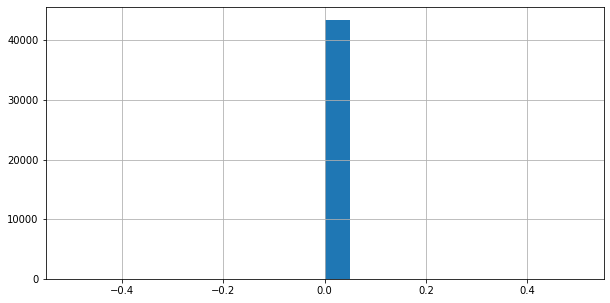

In [105]:
'''
Feature "area_mean" is now well distributed
'''
real_input[feature].hist(figsize = (10, 5), bins = 20)

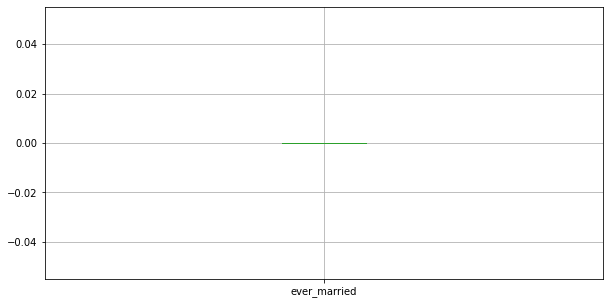

In [106]:
real_input.boxplot(column = feature, figsize = (10, 5))

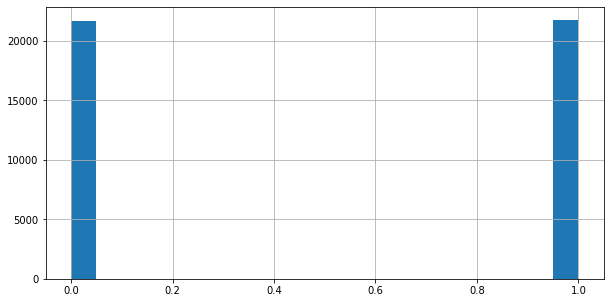

In [107]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

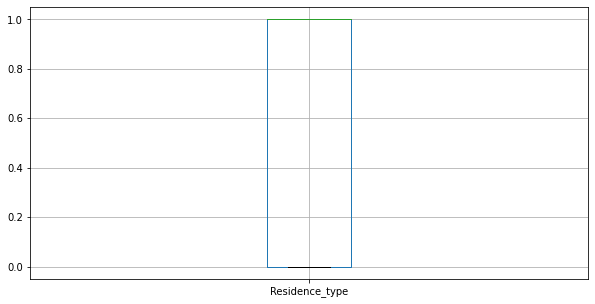

In [108]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [109]:
'''
For feature "smoothness_mean",
outliers found in both histogram and boxplot
Set "ap_hi" < 100 = 100 and "ap_hi" > 170 = 170 
'''

real_input[feature] = real_input[feature].mask(real_input[feature] < 0.09, other = 0.09)


# No-Cardiovascular total sum
total_sum_no_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.09) &\
                                                         (real_input[feature] <= 0.105) &\
                                                         (real_output["stroke"] == 0)])
# No-Cardiovascular zero_len
zero_len_no_cardiovascular = real_input[feature][(real_input[feature] < 0.09) &\
                                           (real_output["stroke"] == 0) &\
                                           (real_input[feature] > 0.105)].size
# No-Cardiovascular dataset size
dataset_len_no_cardiovascular = real_output[(real_output["stroke"] == 0)].size
# No-Cardiovascular mean value
mean_value_no_cardiovascular = total_sum_no_cardiovascular / (dataset_len_no_cardiovascular\
                                                  - zero_len_no_cardiovascular)

# Cardiovascular total sum
total_sum_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.09) &\
                                                      (real_input[feature] <= 0.105) &\
                                                      (real_output["stroke"] == 1)])
# Cardiovascular zero_len
zero_len_cardiovascular = real_input[feature][(real_input[feature] < 0.09) &\
                                        (real_output["stroke"] == 1) &\
                                        (real_input[feature]) > 0.105].size
# Cardiovascular dataset size
dataset_len_cardiovascular = real_output[(real_output["stroke"] == 1)].size
# Cardiovascular mean value
mean_value_cardiovascular = total_sum_cardiovascular / (dataset_len_cardiovascular\
                                                  - zero_len_cardiovascular)


# No-Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.09)|(real_input[feature] > 0.105))&\
                                               (real_output["stroke"] == 0),\
                                               other = mean_value_no_cardiovascular)
# Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.09)|(real_input[feature] > 0.105))&\
                                               (real_output["stroke"] == 1),\
                                               other = mean_value_cardiovascular)

In [110]:
print("feature", feature, "details =")
real_input[feature].describe()

feature Residence_type details =


count    43400.000000
mean         0.067384
std          0.022558
min          0.044138
25%          0.044898
50%          0.044898
75%          0.090000
max          0.090000
Name: Residence_type, dtype: float64

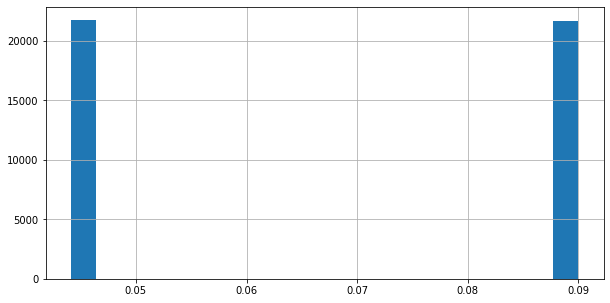

In [111]:
'''
Feature "chol" is now well distributed
'''
real_input[feature].hist(figsize = (10, 5), bins = 20)

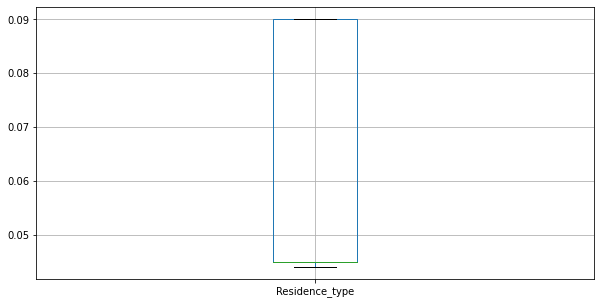

In [112]:
real_input.boxplot(column = feature, figsize = (10, 5))

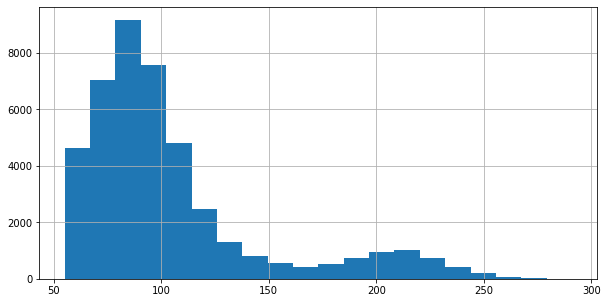

In [113]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

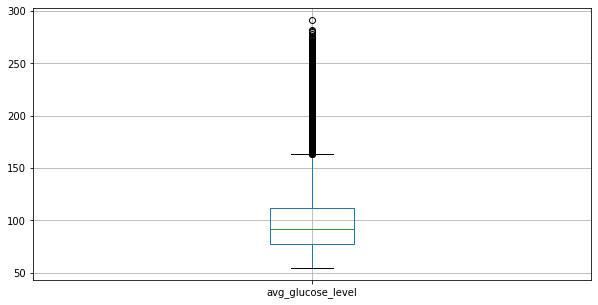

In [114]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [115]:
'''
For feature "compactness_mean",
outliers found in both histogram and boxplot
Set "ap_hi" < 100 = 100 and "ap_hi" > 170 = 170 
'''

real_input[feature] = real_input[feature].mask(real_input[feature] < 0.08, other = 0.08)
real_input[feature] = real_input[feature].mask(real_input[feature] > 0.15, other = 0.15)

# No-Cardiovascular total sum
total_sum_no_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.08) &\
                                                         (real_input[feature] <= 0.15) &\
                                                         (real_output["stroke"] == 0)])
# No-Cardiovascular zero_len
zero_len_no_cardiovascular = real_input[feature][(real_input[feature] < 0.08) &\
                                           (real_output["stroke"] == 0) &\
                                           (real_input[feature] > 0.15)].size
# No-Cardiovascular dataset size
dataset_len_no_cardiovascular = real_output[(real_output["stroke"] == 0)].size
# No-Cardiovascular mean value
mean_value_no_cardiovascular = total_sum_no_cardiovascular / (dataset_len_no_cardiovascular\
                                                  - zero_len_no_cardiovascular)

# Cardiovascular total sum
total_sum_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.08) &\
                                                      (real_input[feature] <= 0.15) &\
                                                      (real_output["stroke"] == 1)])
# Cardiovascular zero_len
zero_len_cardiovascular = real_input[feature][(real_input[feature] < 0.08) &\
                                        (real_output["stroke"] == 1) &\
                                        (real_input[feature]) > 0.15].size
# Cardiovascular dataset size
dataset_len_cardiovascular = real_output[(real_output["stroke"] == 1)].size
# Cardiovascular mean value
mean_value_cardiovascular = total_sum_cardiovascular / (dataset_len_cardiovascular\
                                                  - zero_len_cardiovascular)


# No-Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.08)|(real_input[feature] > 0.15))&\
                                               (real_output["stroke"] == 0),\
                                               other = mean_value_no_cardiovascular)
# Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.08)|(real_input[feature] > 0.15))&\
                                               (real_output["stroke"] == 1),\
                                               other = mean_value_cardiovascular)

In [116]:
print("feature", feature, "details =")
real_input[feature].describe()

feature avg_glucose_level details =


count    4.340000e+04
mean     1.500000e-01
std      9.450882e-14
min      1.500000e-01
25%      1.500000e-01
50%      1.500000e-01
75%      1.500000e-01
max      1.500000e-01
Name: avg_glucose_level, dtype: float64

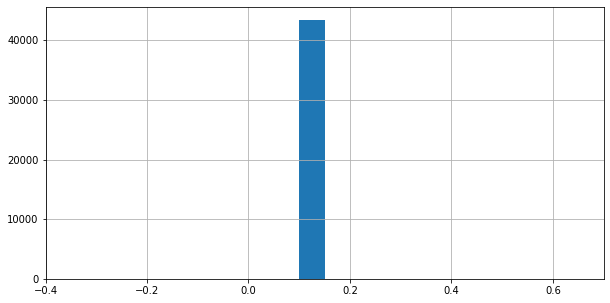

In [117]:
'''
Feature "chol" is now well distributed
'''
real_input[feature].hist(figsize = (10, 5), bins = 20)

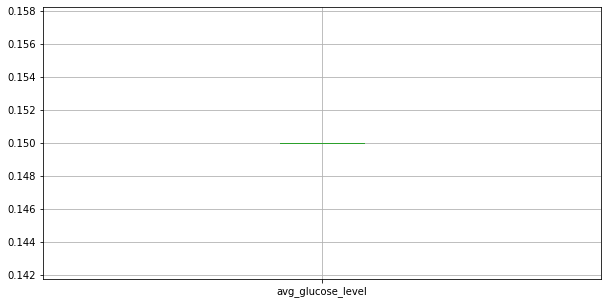

In [118]:
real_input.boxplot(column = feature, figsize = (10, 5))

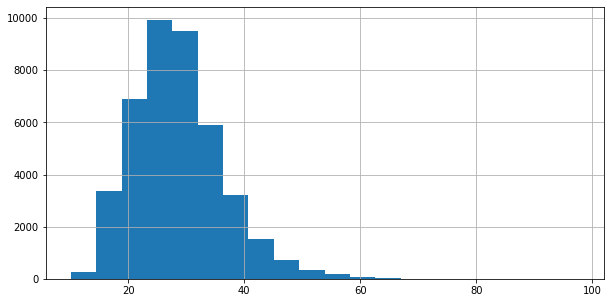

In [119]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

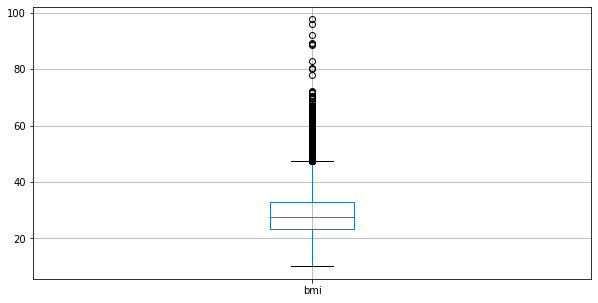

In [120]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [121]:
'''
For feature "concavity mean",
outliers found in both histogram and boxplot
Set "ap_hi" < 100 = 100 and "ap_hi" > 170 = 170 
'''

#real_input[feature] = real_input[feature].mask(real_input[feature] < 1., other = 1.)
real_input[feature] = real_input[feature].mask(real_input[feature] < 0.07, other = 0.07)
real_input[feature] = real_input[feature].mask(real_input[feature] > 0.15, other = 0.15)

# No-Cardiovascular total sum
total_sum_no_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.07) &\
                                                         (real_input[feature] <= 0.15) &\
                                                         (real_output["stroke"] == 0)])
# No-Cardiovascular zero_len
zero_len_no_cardiovascular = real_input[feature][(real_input[feature] < 0.07) &\
                                           (real_output["stroke"] == 0) &\
                                           (real_input[feature] > 0.15)].size
# No-Cardiovascular dataset size
dataset_len_no_cardiovascular = real_output[(real_output["stroke"] == 0)].size
# No-Cardiovascular mean value
mean_value_no_cardiovascular = total_sum_no_cardiovascular / (dataset_len_no_cardiovascular\
                                                  - zero_len_no_cardiovascular)

# Cardiovascular total sum
total_sum_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.07) &\
                                                      (real_input[feature] <= 0.15) &\
                                                      (real_output["stroke"] == 1)])
# Cardiovascular zero_len
zero_len_cardiovascular = real_input[feature][(real_input[feature] < 0.07) &\
                                        (real_output["stroke"] == 1) &\
                                        (real_input[feature]) > 0.15].size
# Cardiovascular dataset size
dataset_len_cardiovascular = real_output[(real_output["stroke"] == 1)].size
# Cardiovascular mean value
mean_value_cardiovascular = total_sum_cardiovascular / (dataset_len_cardiovascular\
                                                  - zero_len_cardiovascular)


# No-Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.07)|(real_input[feature] > 0.15))&\
                                               (real_output["stroke"] == 0),\
                                               other = mean_value_no_cardiovascular)
# Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.07)|(real_input[feature] > 0.15))&\
                                               (real_output["stroke"] == 1),\
                                               other = mean_value_cardiovascular)

In [122]:
print("feature", feature, "details =")
real_input[feature].describe()

feature bmi details =


count    4.193800e+04
mean     1.500000e-01
std      8.512737e-14
min      1.500000e-01
25%      1.500000e-01
50%      1.500000e-01
75%      1.500000e-01
max      1.500000e-01
Name: bmi, dtype: float64

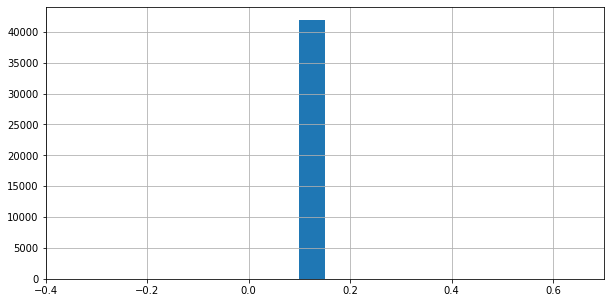

In [123]:
'''
Feature "hemo" is now well distributed
'''
real_input[feature].hist(figsize = (10, 5), bins = 20)

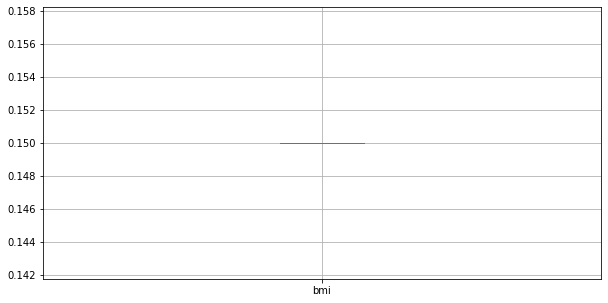

In [124]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [128]:
real_input.describe()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi
count,43400.000000,43400.0,43400.0,43400.0,43400.000000,4.340000e+04,4.193800e+04
mean,2.089557,0.0,0.0,0.0,0.067384,1.500000e-01,1.500000e-01
std,3.665123,0.0,0.0,0.0,0.022558,9.450882e-14,8.512737e-14
min,0.017880,0.0,0.0,0.0,0.044138,1.500000e-01,1.500000e-01
25%,1.103926,0.0,0.0,0.0,0.044898,1.500000e-01,1.500000e-01
50%,1.103926,0.0,0.0,0.0,0.044898,1.500000e-01,1.500000e-01
75%,1.103926,0.0,0.0,0.0,0.090000,1.500000e-01,1.500000e-01
max,18.000000,0.0,0.0,0.0,0.090000,1.500000e-01,1.500000e-01


In [129]:
# data correlation 
real_input.corr()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi
age,1.000000,NaN,NaN,NaN,0.002652,NaN,NaN
hypertension,NaN,NaN,NaN,NaN,NaN,NaN,NaN
heart_disease,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ever_married,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Residence_type,0.002652,NaN,NaN,NaN,1.000000,NaN,NaN
avg_glucose_level,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,NaN,NaN,NaN,NaN,NaN,NaN,NaN


([<matplotlib.axis.YTick at 0x7fe7bb067690>,
 [Text(0, 0, 'gender'),
  Text(0, 0, 'age'),
  Text(0, 0, 'hypertension'),
  Text(0, 0, 'heart_disease'),
  Text(0, 0, 'ever_married'),
  Text(0, 0, 'Residence_type'),
  Text(0, 0, 'avg_glucose_level'),
  Text(0, 0, 'bmi'),
  Text(0, 0, 'smoking_status')])

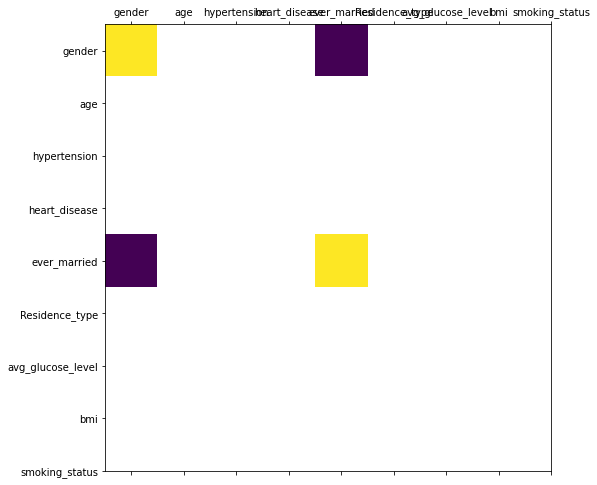

In [130]:
# graphical representation of data correlation
# data correlation means dependency of data among each others i.e.
# dependency of attributes among each other
'''
data correlation formula between two attributes (data columns) X and Y -

            Σ(X - Xmean) * Σ(Y - Ymean) 
corr = -------------------------------------
       sqrt(Σ(X - Xmean)^2 * Σ(Y - Ymean)^2)
       
'''
plt.matshow(real_input.corr())
plt.xticks(ticks = np.arange(real_input.columns.size), labels = real_input.columns)
plt.yticks(ticks = np.arange(real_input.columns.size), labels = real_input.columns)

In [131]:
# split real_input and real_output into train and test input, output taking
# 70:30 train:test 
train_input, test_input, train_output, test_output = sk_model.train_test_split(real_input,\
                                                                                real_output,\
                                                                                train_size = 0.60)
train_input.shape, test_input.shape, train_output.shape, test_output.shape

((26040, 9), (17360, 9), (26040, 1), (17360, 1))

In [132]:
'''
Tensor-Flow Keras Neural Network model life-cycle.
1. Define the model,
2. Compile the model,
3. Fit the model,
4. Evaluate the model,
5. Predict the model.
'''

'\nTensor-Flow Keras Neural Network model life-cycle.\n1. Define the model,\n2. Compile the model,\n3. Fit the model,\n4. Evaluate the model,\n5. Predict the model.\n'

In [133]:
# Define model1
h1, h2 = 8, 12
o = 1
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(h1, activation = 'tanh',\
                                kernel_initializer = 'glorot_uniform',\
                                input_shape = (train_input.shape[1],)))
model1.add(tf.keras.layers.Dense(h2, activation = 'tanh',\
                                kernel_initializer = 'glorot_uniform'))
model1.add(tf.keras.layers.Dense(o, activation = 'tanh',\
                                kernel_initializer = 'glorot_uniform'))

In [134]:
# Define model2
h1, h2 = 8, 12
o = 1
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(h1, activation = 'sigmoid',\
                                kernel_initializer = 'glorot_uniform',\
                                input_shape = (train_input.shape[1],)))
model2.add(tf.keras.layers.Dense(h2, activation = 'sigmoid',\
                                kernel_initializer = 'glorot_uniform'))
model2.add(tf.keras.layers.Dense(o, activation = 'sigmoid',\
                                kernel_initializer = 'glorot_uniform'))

In [135]:
# Define model3
h1, h2 = 8, 12
o = 1
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Dense(h1, activation = 'softplus',\
                                kernel_initializer = 'glorot_uniform',\
                                input_shape = (train_input.shape[1],)))
model3.add(tf.keras.layers.Dense(h2, activation = 'softplus',\
                                kernel_initializer = 'glorot_uniform'))
model3.add(tf.keras.layers.Dense(o, activation = 'softplus',\
                                kernel_initializer = 'glorot_uniform'))

In [136]:
# Define model4
h1, h2 = 8, 12
o = 1
model4 = tf.keras.Sequential()
model4.add(tf.keras.layers.Dense(h1, activation = 'relu',\
                                kernel_initializer = 'glorot_uniform',\
                                input_shape = (train_input.shape[1],)))
model4.add(tf.keras.layers.Dense(h2, activation = 'relu',\
                                kernel_initializer = 'glorot_uniform'))
model4.add(tf.keras.layers.Dense(o, activation = 'sigmoid',\
                                kernel_initializer = 'glorot_uniform'))

In [137]:
# Define model5
h1, h2 = 8, 12
o = 1
model5 = tf.keras.Sequential()
model5.add(tf.keras.layers.Dense(h1, activation = 'swish',\
                                kernel_initializer = 'glorot_uniform',\
                                input_shape = (train_input.shape[1],)))
model5.add(tf.keras.layers.Dense(h2, activation = 'swish',\
                                kernel_initializer = 'glorot_uniform'))
model5.add(tf.keras.layers.Dense(o, activation = 'swish',\
                                kernel_initializer = 'glorot_uniform'))

In [138]:
# Compile model1
opt1 = tf.keras.optimizers.SGD(learning_rate = .001,\
                              momentum = 0.0)
model1.compile(optimizer=opt1, loss='mse', metrics=['binary_accuracy'])

In [139]:
# Compile model2
opt2 = tf.keras.optimizers.SGD(learning_rate = .001,\
                              momentum = 0.0)
model2.compile(optimizer=opt2, loss='mse', metrics=['binary_accuracy'])

In [140]:
# Compile model3
opt3 = tf.keras.optimizers.SGD(learning_rate = .001,\
                              momentum = 0.0)
model3.compile(optimizer=opt3, loss='mse', metrics=['binary_accuracy'])

In [141]:
# Compile model4
opt4 = tf.keras.optimizers.SGD(learning_rate = .001,\
                              momentum = 0.0)
model4.compile(optimizer=opt4, loss='mse', metrics=['binary_accuracy'])

In [142]:
# Compile model5
opt5 = tf.keras.optimizers.SGD(learning_rate = .001,\
                              momentum = 0.0)
model5.compile(optimizer=opt5, loss='mse', metrics=['binary_accuracy'])

In [160]:
# Fit the model1
st1 = time.time()
train_history1 = model1.fit(train_input, train_output,\
                          epochs=10000, batch_size=train_output.size,\
                          verbose = 1) 
en1 = time.time()
en1 - st1

ValueError: ignored